In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb 
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
df=pd.read_csv('hotels.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          2556 non-null   int64  
 1   city                 2556 non-null   object 
 2   name                 2556 non-null   object 
 3   rooms                2455 non-null   float64
 4   integration_service  1691 non-null   object 
 5   seasonal             2467 non-null   object 
 6   partnership_status   2552 non-null   object 
 7   activated_method     2556 non-null   object 
 8   first_activated_at   2532 non-null   object 
 9   first_year_ends      2532 non-null   object 
 10  trips                2556 non-null   int64  
 11  revenue              2556 non-null   float64
 12  revenue_per_trip     2556 non-null   float64
 13  tc                   2556 non-null   float64
 14  dc                   2556 non-null   float64
 15  trips_first_year     2556 non-null   i

In [4]:
df.isnull().sum()

property_id              0
city                     0
name                     0
rooms                  101
integration_service    865
seasonal                89
partnership_status       4
activated_method         0
first_activated_at      24
first_year_ends         24
trips                    0
revenue                  0
revenue_per_trip         0
tc                       0
dc                       0
trips_first_year         0
revenue_first_year       0
tc_first_year            0
dc_first_year            0
dtype: int64

In [5]:
#feature engineering
df['integration_service'] = df['integration_service'].fillna('light')
df['integration_service'] = df['integration_service'].replace({'BookingCom':'Schedulers'})
df['integration_service'] = df['integration_service'].replace({'Expedia':'Schedulers'})
df['seasonal'] = df['seasonal'].fillna(0)
df['seasonal'] = df['seasonal'].replace({True: "Yes", False: "No"})
df['revenue_per_trip_first_year']=df['revenue_first_year']/df['trips_first_year']

## drop nas
df.dropna(subset=['partnership_status'],inplace=True)
df.dropna(subset=['first_activated_at'],inplace=True)
df.dropna(subset=['rooms'],inplace=True)
df.dropna(subset=['revenue_per_trip_first_year'],inplace=True)

## drop columns
df.drop(columns='property_id',inplace=True)
df.drop(columns='trips',inplace=True)
df.drop(columns='tc',inplace=True)
df.drop(columns='dc',inplace=True)
df.drop(columns='dc_first_year',inplace=True)
df.drop(columns='tc_first_year',inplace=True)
df.drop(columns='revenue_per_trip',inplace=True)
df.drop(columns='revenue',inplace=True)
df.drop(columns='activated_method',inplace=True)

In [6]:
df.isnull().sum()

city                           0
name                           0
rooms                          0
integration_service            0
seasonal                       0
partnership_status             0
first_activated_at             0
first_year_ends                0
trips_first_year               0
revenue_first_year             0
revenue_per_trip_first_year    0
dtype: int64

In [7]:
df

,city,name,rooms,integration_service,seasonal,partnership_status,first_activated_at,first_year_ends,trips_first_year,revenue_first_year,revenue_per_trip_first_year
0,athens,The Athens Gate Hotel,99.0,webhotelier,No,Active Partnership,5/18/2017,5/18/2018,338,19142.9,56.635799
1,athens,Herodion Hotel,90.0,webhotelier,No,Active Partnership,12/16/2016,12/16/2017,288,14921.1,51.809375
2,athens,Attalos Hotel,78.0,webhotelier,No,Active Partnership,2/23/2018,2/23/2019,294,11308.9,38.465646
3,athens,Electra Palace Hotel,155.0,light,No,Stopped Partnership,7/8/2016,7/8/2017,158,19549.0,123.727848
4,athens,Electra Metropolis Athens,216.0,light,No,Revisit Lead,1/13/2017,1/13/2018,345,43840.1,127.072754
...,...,...,...,...,...,...,...,...,...,...,...
2543,madrid,Aparthotel G3 Galeon,38.0,light,No,Paused Partnership (Hotel closed),6/18/2019,6/17/2020,1,10.3,10.300000
2546,lisbon,Luzeiros Suites,105.0,light,No,Stopped Partnership,3/13/2020,3/13/2021,1,9.2,9.200000
2548,thessaloniki,Roof Loft Studios,2.0,light,No,Revisit Partnership,3/28/2018,3/28/2019,1,4.5,4.500000
2549,lisbon,Lisbon Dreams Guest House,18.0,light,No,Stopped Partnership,2/21/2020,2/20/2021,1,18.8,18.800000


C:\Users\marag\AppData\Local\Temp\ipykernel_34184\4019656266.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sb.heatmap(df.corr(), annot = True, cmap='Blues')


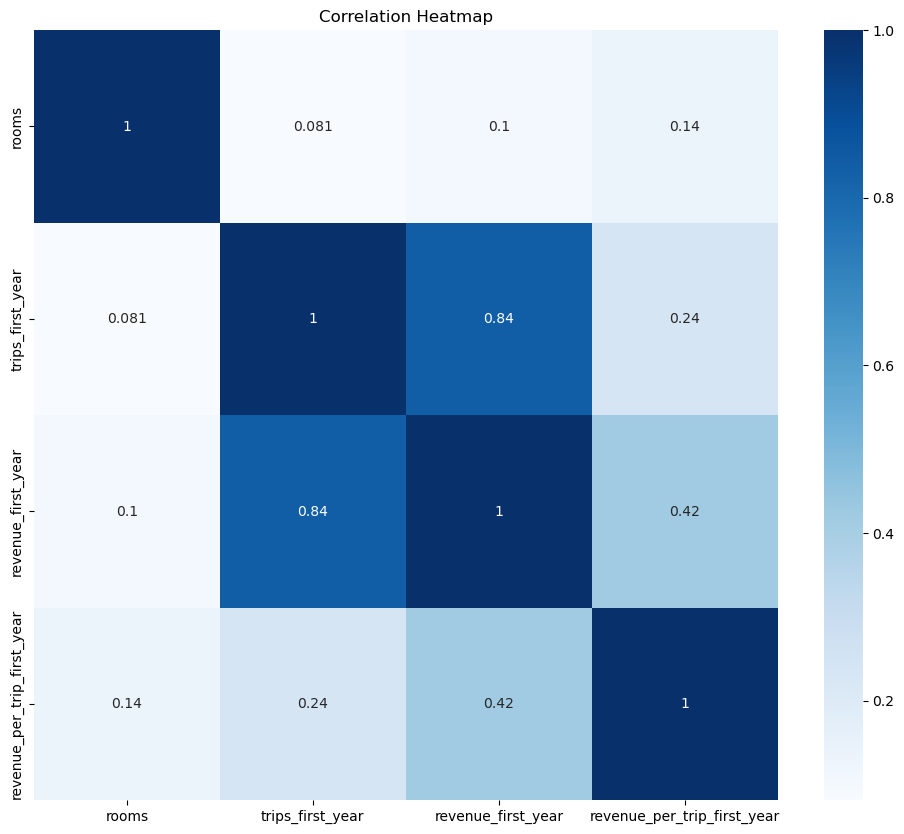

In [8]:
plt.figure(figsize = (12,10))
plt.title('Correlation Heatmap')
heatmap = sb.heatmap(df.corr(), annot = True, cmap='Blues')

In [9]:
df.describe()

,rooms,trips_first_year,revenue_first_year,revenue_per_trip_first_year
count,1743.000000,1743.000000,1743.000000,1743.000000
mean,71.962708,40.711417,1009.177717,20.845231
std,79.745169,53.448355,2078.002631,12.652674
min,0.000000,1.000000,-53.100000,-31.600000
25%,22.000000,5.000000,81.100000,14.512222
50%,45.000000,18.000000,321.900000,18.485366
75%,91.000000,55.000000,1112.400000,23.900000
max,623.000000,345.000000,43840.100000,262.600000


In [10]:
X_revenue = df[['city', 'integration_service', 'seasonal', 'rooms']]
y_revenue = df['revenue_per_trip_first_year']

categorical_features = ['city', 'integration_service','seasonal']
one_hot = OneHotEncoder(handle_unknown='ignore')

preprocessor_revenue = ColumnTransformer(
    transformers=[('cat', one_hot, categorical_features)],
    remainder='passthrough'
)

models_revenue = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(random_state=42),
    'Lasso': Lasso(random_state=42),
    'ElasticNet': ElasticNet(random_state=42),
    'RandomForestRegressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42),
    'XGBRegressor': XGBRegressor(random_state=42),
    'SVR': SVR()
}

def evaluate_models_revenue(models_revenue, X_revenue, y_revenue):
    results_revenue = {}
    for name, model in models_revenue.items():
        pipeline_revenue = Pipeline(steps=[('preprocessor', preprocessor_revenue),
                                   ('model', model)])
        
        X_train_revenue, X_test_revenue, y_train_revenue, y_test_revenue = train_test_split(X_revenue, y_revenue, test_size=0.2, random_state=42)
        
        pipeline_revenue.fit(X_train_revenue, y_train_revenue)
        
        y_pred_revenue = pipeline_revenue.predict(X_test_revenue)
        
        mse = mean_squared_error(y_test_revenue, y_pred_revenue)
        rmse = np.sqrt(mse)
        
        cv_scores = cross_val_score(pipeline_revenue, X_revenue, y_revenue, cv=5, scoring='neg_mean_squared_error')
        cv_rmse = np.sqrt(-cv_scores.mean())
        
        results_revenue[name] = {
            'MSE': mse,
            'RMSE': rmse,
            'CV_RMSE': cv_rmse
        }
        
        print(f"{name} - MSE: {mse}, RMSE: {rmse}, CV_RMSE: {cv_rmse}")
    
    return results_revenue

model_results_revenue = evaluate_models_revenue(models_revenue, X_revenue, y_revenue)

LinearRegression - MSE: 73.13995768432324, RMSE: 8.552190227323246, CV_RMSE: 12.239847907300952
Ridge - MSE: 71.73457463129333, RMSE: 8.469626593380214, CV_RMSE: 12.09396843135703
Lasso - MSE: 79.30660473574945, RMSE: 8.905425578586879, CV_RMSE: 12.621352524047094
ElasticNet - MSE: 79.22268629938714, RMSE: 8.900712684913897, CV_RMSE: 12.621294488414751
RandomForestRegressor - MSE: 101.44401058269194, RMSE: 10.071941748376624, CV_RMSE: 13.21218609293343
GradientBoostingRegressor - MSE: 77.72039178361184, RMSE: 8.815916956483418, CV_RMSE: 12.714480934023406
XGBRegressor - MSE: 103.45295793977509, RMSE: 10.171182720793835, CV_RMSE: 13.744850376355974
SVR - MSE: 77.542677050265, RMSE: 8.80583199080388, CV_RMSE: 12.803323914160563


In [11]:
X_trips = df[['city', 'integration_service', 'seasonal', 'rooms']]
y_trips = df['trips_first_year']

categorical_features = ['city', 'integration_service','seasonal']
one_hot = OneHotEncoder(handle_unknown='ignore')

preprocessor_trips = ColumnTransformer(
    transformers=[('cat', one_hot, categorical_features)],
    remainder='passthrough'
)

models_trips = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(random_state=42),
    'Lasso': Lasso(random_state=42),
    'ElasticNet': ElasticNet(random_state=42),
    'RandomForestRegressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42),
    'XGBRegressor': XGBRegressor(random_state=42),
    'SVR': SVR()
}

# Function to perform training and cross-validation
def evaluate_models_trips(models_trips, X_trips, y_trips):
    results_trips = {}
    for name, model in models_trips.items():
        pipeline_trips = Pipeline(steps=[('preprocessor', preprocessor_trips),
                                   ('model', model)])
        
        X_train_trips, X_test_trips, y_train_trips, y_test_trips = train_test_split(X_trips, y_trips, test_size=0.2, random_state=42)
        
        pipeline_trips.fit(X_train_trips, y_train_trips)
        
        y_pred_trips = pipeline_trips.predict(X_test_trips)
        
        mse = mean_squared_error(y_test_trips, y_pred_trips)
        rmse = np.sqrt(mse)
        
        cv_scores = cross_val_score(pipeline_trips, X_trips, y_trips, cv=5, scoring='neg_mean_squared_error')
        cv_rmse = np.sqrt(-cv_scores.mean())
        
        results_trips[name] = {
            'MSE': mse,
            'RMSE': rmse,
            'CV_RMSE': cv_rmse
        }
        
        print(f"{name} - MSE: {mse}, RMSE: {rmse}, CV_RMSE: {cv_rmse}")
    
    return results_trips

model_results_trips = evaluate_models_trips(models_trips, X_trips, y_trips)


LinearRegression - MSE: 2097.721608276202, RMSE: 45.800890911380776, CV_RMSE: 59.100239653377386
Ridge - MSE: 2056.781175142658, RMSE: 45.35174941656229, CV_RMSE: 58.49458399835015
Lasso - MSE: 2045.0545226894747, RMSE: 45.22227905235952, CV_RMSE: 59.99391128621904
ElasticNet - MSE: 2172.052559976423, RMSE: 46.60528467863299, CV_RMSE: 60.43638363404756
RandomForestRegressor - MSE: 2568.127719140044, RMSE: 50.6766979897077, CV_RMSE: 62.97798851471622
GradientBoostingRegressor - MSE: 2003.7591864724989, RMSE: 44.76336880164963, CV_RMSE: 58.92517113766484
XGBRegressor - MSE: 2414.359998506409, RMSE: 49.13613739913231, CV_RMSE: 61.258906827205394
SVR - MSE: 2652.8291456726365, RMSE: 51.50562246660685, CV_RMSE: 61.900617240488025


In [12]:

X = df[['city', 'integration_service', 'seasonal', 'rooms']]
y_revenue = df['revenue_per_trip_first_year']
y_trips = df['trips_first_year']

categorical_features = ['city', 'integration_service','seasonal']

one_hot = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(transformers=[
    ('cat', one_hot, categorical_features)],
    remainder='passthrough'
)

model_revenue = LinearRegression()
model_trips = LinearRegression()

pipeline_revenue = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('model', model_revenue)])

pipeline_trips = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('model', model_trips)])

X_train_revenue, X_test_revenue, y_train_revenue, y_test_revenue = train_test_split(X, y_revenue, test_size=0.2, random_state=42)
X_train_trips, X_test_trips, y_train_trips, y_test_trips = train_test_split(X, y_trips, test_size=0.2, random_state=42)

pipeline_revenue.fit(X_train_revenue, y_train_revenue)
pipeline_trips.fit(X_train_trips, y_train_trips)

new_property_details = pd.DataFrame({
    'city': ['madrid'],
    'integration_service': ['siteminder_smx'], 
    'rooms': [150],  
    'seasonal': ['Yes']
})

predicted_revenue = pipeline_revenue.predict(new_property_details)
predicted_trips = pipeline_trips.predict(new_property_details)

# Calculate the total predicted revenue
total_predicted_revenue = predicted_trips[0] * predicted_revenue[0]
total_predicted_revenue


1121.9789592242123

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1743 entries, 0 to 2553
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   city                         1743 non-null   object 
 1   name                         1743 non-null   object 
 2   rooms                        1743 non-null   float64
 3   integration_service          1743 non-null   object 
 4   seasonal                     1743 non-null   object 
 5   partnership_status           1743 non-null   object 
 6   first_activated_at           1743 non-null   object 
 7   first_year_ends              1743 non-null   object 
 8   trips_first_year             1743 non-null   int64  
 9   revenue_first_year           1743 non-null   float64
 10  revenue_per_trip_first_year  1743 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 163.4+ KB


In [15]:
df.to_csv('hotelapp.csv')

In [ ]:
910873/968772

In [ ]:
from joblib import dump

dump(pipeline_trips, 'model_pipeline_trips.joblib'),dump(pipeline_revenue, 'model_pipeline_revenue.joblib')